In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# Let's draw one random number
x = np.random.random_sample()
print(x)

0.43754601547937155


In [3]:
np.random.seed(0)
x = np.random.random_sample(5)
print(x)
x = np.random.random_sample(5)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]


In [4]:
a=5
b=20
x = np.random.random_sample(10000)
y = (b-a)*x+a
print(y)

[16.87587557 12.9334238  13.52066842 ... 10.58037146  7.94258142
 17.10788368]


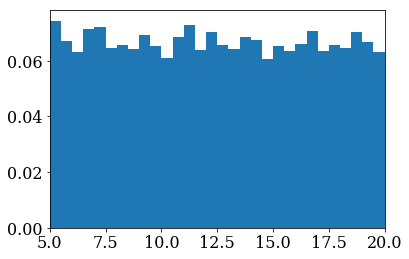

In [5]:
binwidth=0.5
plt.xlim(5,20)
plt.hist(y,bins=np.arange(5.,21., binwidth),normed=True);

### Generation of other random distributions

ditributions habituelles:
1) Gaussienne : $$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-0.5(\frac{x-\mu}{\sigma})^2}$$
2)exponentielle: $$x\leq 0 \quad p(x)=\alpha e^{-\alpha x}$$ $$x<0 \quad p(x)=0$$ 

Si les ditributions cumulatives sont connues et inversibles, on eput alors reproduire le générateur aléatoire correspondant en utilisant un générateur aléatoire uniforeme sur $[0,1]$. 

ex. distribution exponentielle: $$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

For $x\in [0, 1]$, the inverse of this distribution is thus,

$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

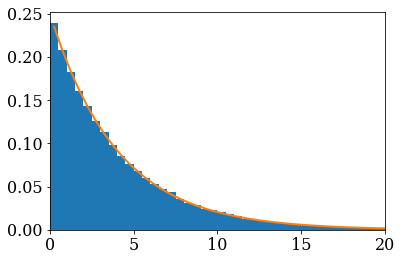

In [6]:
#on implémente le tout
alpha = 0.25 #vitesse de notre distribution
x =  np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

#plot
binwidth=0.5
plt.xlim(0,20)
bins=np.arange(0.,21., binwidth)
plt.hist(y, bins, normed =True);

#compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, alpha*np.exp(-alpha*xc), lw=2)

### Von Neumann rejection method

on génère un set de nb aléatoires avec une certaine distribution p1 et on extrait ce qui obéit à p2. Pour cela il faut que $$p_2(x) \leq Kp_1(x) \quad \forall x $$

example: gaussienne positive, commençons par une exponentielle avec $\alpha=1$

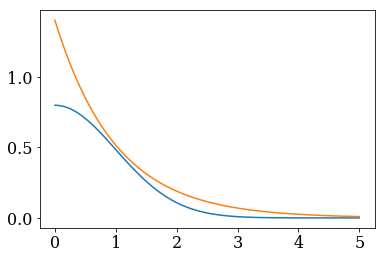

In [7]:
nx = 100

xi = np.linspace(0,5,nx)

f1=2*np.exp(-xi**2/2.0)/np.sqrt(2*np.pi)
f2=1.4*np.exp(-np.abs(xi))

plt.plot(xi,f1)
plt.plot(xi,f2)


fonctionnement de l'algorithme: 
1. on génère un nb x selon notre distribution exponentielle
2. on tire un nb au hasard U entre 0 et 1
3. on garde x si $U< \frac{p_2(x)}{Kp_1(x)}$



Size of accepted set h and expected size 1/K: 71370 71428.57142857143


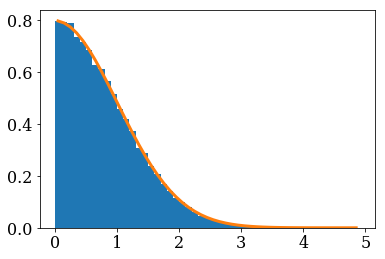

In [8]:
#nb de VA prises selon p1
N = 100000
K = 1.4

h=[]

for i in range(N):
    u1= np.random.random_sample()
    
    #distribution de g selon une exponentielle
    g = np.log(1/(1-u1))
    
    #on génère un 2e nb pour la cond d'accept/reject
    u2 = np.random.random_sample()
    
    #tri
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)/ \
            (K*np.exp(-g))
        
    if (u2<ratio):
        h.append(g)
        
#size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

#plots
binwidth=0.1
bins=np.arange(0.,5.,binwidth)
plt.hist(h, bins=np.arange(0.,5.,binwidth), normed=True);

#center of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

Acceptance ratio: 0.71551


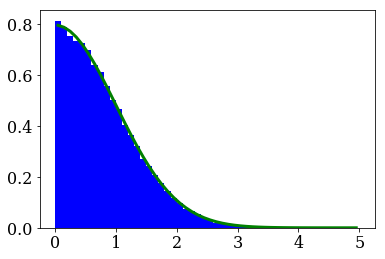

In [9]:
# Distribute g according to the exponential distribution
uniform1 = np.random.random_sample(N)
g = np.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = np.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = np.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = np.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
plt.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')


### Challenge

1) Regardez la librairie python sur les générateurs de nombres aléatoires et testez-en qq un. En particulier comparez le output de l'exponentielle et de la gaussienne avec les versions implémentées ci-dessus.

2) Une autre methode pour générer des nombres pour la gaussienne c'est l'algorithme de Box-Muller. Implémentez-le et testez-le.

9.154109232687674


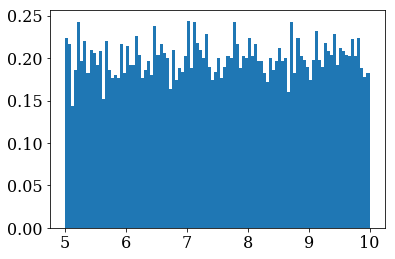

In [10]:
x=np.random.uniform(5,10)
print(x)

h=plt.hist(np.random.uniform(5,10,10000), bins=100, normed=True)
plt.show()

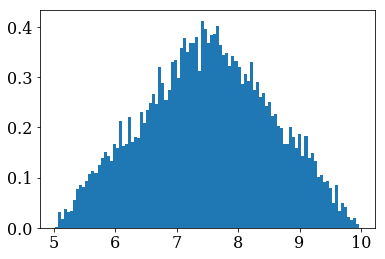

In [11]:
x=np.random.triangular(5, 7.5, 10,10000)



h=plt.hist(np.random.triangular(5,7.5,10,10000), bins=100, normed=True)
plt.show()

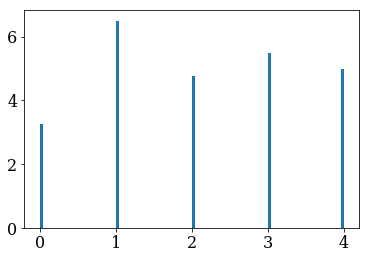

In [12]:
a=np.random.random_sample()
h=plt.hist(np.random.choice(5,100), bins=100, normed=True)
plt.show()

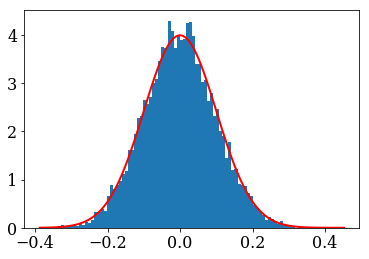

In [13]:
mu, sigma =0,0.1

gauss=np.random.normal(mu,sigma,10000)

#plots
count, bins, ignored=plt.hist(gauss, bins=100, normed=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')
plt.show()
#center of bins
#xc = bins[:-1] + binwidth/2
#plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

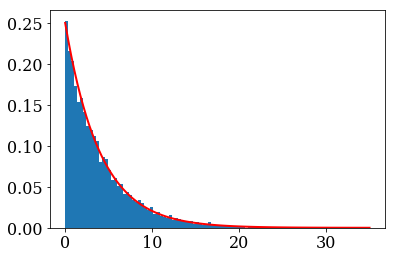

In [14]:
exp=np.random.exponential(4,10000)

#plots
count, bins, ignored=plt.hist(exp, bins=100, normed=True)
plt.plot(bins, 1/4*np.exp(-bins / 4), linewidth=2, color='r')
plt.show()

2) méthode de Box-Muller

consiste à générer des pairs de NA à distribution normale centrée réduite, à partir d'une source de nb aléatoires de loi uniforme.

**Forme cartésienne** 
On choisi indépendamment et uniformément x et y dans [-1,1], et $s=x² + y²$. Si $s \geq 1$ ou $s=0$, on rejete ce couple et on en retire un nouveau, jusqu'à ce que $s \in ]0,1[$.

Ensuite on calcul $$z_0=x\sqrt{\frac{-2lns}{s}}$$ 
$$z_1=y\sqrt{\frac{-2lns}{s}}$$

In [15]:
x=np.random.uniform(-1,1)
y=np.random.uniform(-1,1)
s=x**2+y**2
N=1000
for i in range(0,N):
    if s>=1 or s==0:
        x[i] = np.random.uniform(-1,1)
        y[i]= np.random.uniform(-1,1)
        s=x**2+y**2
    else: 
        z0=x*np.sqrt((-2*np.log(s))/s)
        z1=y*np.sqrt((-2*np.log(s))/s)
print(z0,z1)

0.44146236594648147 0.9112435466989689


**methode en coord. sphériques**

In [16]:
def boxmuller(x,y):
    z0 = np.sqrt(-2*np.log(x))*np.cos(2*np.pi*y)
    z1 = np.sqrt(-2*np.log(x))*np.sin(2*np.pi*y)
    return z0,z1


In [17]:
N=1000
x = np.random.random_sample(N)
y = np.random.random_sample(N)

In [18]:
z0,z1=boxmuller(x,y)

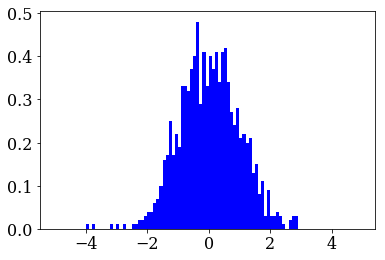

In [19]:
binwidth=0.1
bins=np.arange(-5.1,2.1, binwidth)
plt.hist(z0, bins=np.arange(-5.,5., binwidth), normed=True, color='blue');

### brownian motion

**equation stochastic pour le mvt brownien**

L'évolution de la molécule est donnée par: $dx=x(t+dt)-x(t)=ds$
Ou $ds$ décrit le déplacement résultant des collisions avec les molécules d'eau environnante. 

Modelisation de $ds$: $ds=\sqrt{2\alpha dt} N(0,1)$ avec $\alpha$ etant le même que dans l'éq de diffusion: $\frac{\partial \rho}{\partial t} = \alpha \frac{\partial² \rho}{\partial x²}$

Et à chaque instant dt, $N(0,1)$ est un NA générer à partir d'une distribution gaussienne $f(n)$, centré en 0 et de variance 1. $$f(n)=\frac{1}{\sqrt{2\pi}} e^{-0.5n²}$$

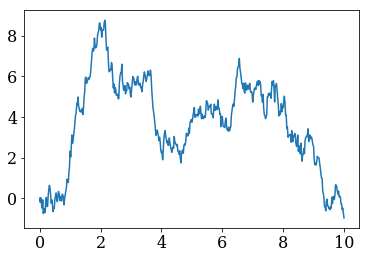

In [20]:
#commençons par suivre une particule, initialement au repos en x=0

T=10.0   #durée totale de simulation

nt=500   #nb de pas de temps 
dt=T/nt  #interval de temps

alpha=2.0    #coeff de diffusion

#C.I.
t = np.arange(0,T+dt, dt)
x = np.empty(nt+1)
x[0]=0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)
    
plt.plot(t,x)

On a bel et bien que notre particule se déplace dans tout les sens (positif et négatif), mais on aimerait encore vérifier que ce model de ds permet bel et bien de reproduire le processus de diffusion.

Comparons donc à l'équation de diffusion: 

On aimerait maintenant suivre un échantillon de nos molécules. On peut décrire leur densité à partir de leur position: $ \rho(x,t)dx = n(x,t)/N$  avec $n(x.t)$ qui représente à un instant donné le nb de molécules dans un intervalle dx, centré en x et N est le nb total de molécule de l'échantillon.

Afin de tester ce modèle et de le comparer à la diffusion, on initialise la position de l'échantillon à l'aide d'une distribution gaussienne.

$$P(x) = \frac{1}{\sqrt{2\pi\sigma²}}e^{-\frac{(x-\mu)²}{2\sigma²}}$$

où $\sigma²$ est la variance et $\mu$ est la moyenne.

Or comme $n(x,0)=NP(x)dx$ on aura que $\rho (x,0)=P(x)$. Dans ce cas, la solution de l'ếq de diffusion est: $$\rho (x,t) = \frac{1}{\sqrt{2\pi\sigma_t²}}e^{-\frac{(x-\mu)²}{2\sigma_i²}}$$
avec $\sigma_t²=2\alpha t+\sigma²$

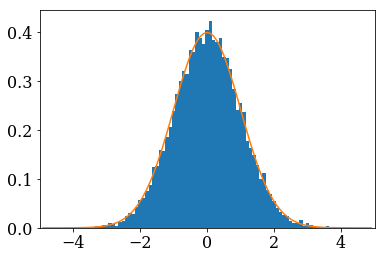

In [21]:
#commençons par initialiser la position de l'échnantillon

npart=10000

#on choisi u=0 (on le mettra simplement pas dans le calcul)
sigma = 1.0
x0 = np.random.normal(loc=0, scale=sigma, size=npart)

#creation de bins centré autour de 0
binwidth=0.1
bins=np.arange(-5,5, binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

plt.xlim(-5,5)
plt.hist(x0, bins, normed=True);
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

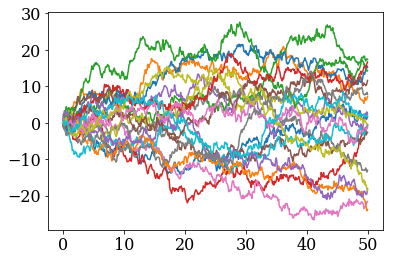

In [22]:
#Faisons maintenant un plot de qqes trajectoires

T=50.0
nt=500
dt=T/nt
alpha=2.0

t=np.arange(0,T+dt,dt)
x=np.empty([nt+1, npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)
    
for i in range(20):
    plt.plot(t,x[:,i])

Les molécules commencent toutes en 0, mais très vite leur trajectoire évolue et elle prennent toutes une direction différentes.

Regardons maintenant à quoi ressemble l'histo des positions à la fin de la simulation et comparons à la solution analytique:

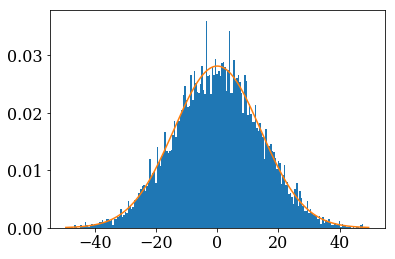

In [23]:
binwidth=0.5
bins= np.arange(-50,50,binwidth)
bins=bins+binwidth/2

bin_centers = bins[:-1]+binwidth/2

plt.hist(x[nt], bins, normed=True);

sigmat2=2*alpha*T+sigma**2
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

**Challenge**
Ajoutez une contribution systematic à dx: $dx=cdt + \sqrt{2\alpha dt}N(0,1)$

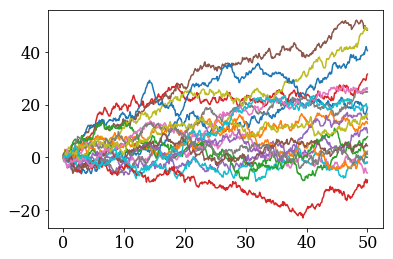

In [24]:
#commençons par suivre une particule, initialement au repos en x=0

T=50.0   #durée totale de simulation

nt=500   #nb de pas de temps 
dt=T/nt  #interval de temps

alpha=2.0    #coeff de diffusion
c=0.4    #cte à déterminer?
npart=10000

#C.I.
t = np.arange(0,T+dt, dt)
x = np.empty([nt+1, npart])
x[0]=0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1, npart)+c*dt
for i in range(20):
    plt.plot(t,x[:,i])

On remarque que si c est très grand la trajectoire est une droite, et donc cette partie constante l'emporte sur la distribution aléatoire. 

$$dx=cdt + \sqrt{2\alpha t}N(0,1)$$
A $t=0$ on a une distribution gaussienne de nos positions $\sqrt{2\alpha t}N(0,1)$, à cela on ajoute un terme de déplacement $ct$. Considérons donc la nouvelle équation: $y=x+ct$. Le terme $cdt$ impose à notre système de prendre une certaine direction. Autrement dit notre moyenne va changer, mais notre variance reste la même.

On aura toujours une équation de diffusion, mais qui dépend de y:

$$\frac{\partial \rho}{\partial t} = \alpha \frac{\partial^2 \rho}{\partial y^2}$$

équation finale: $$\frac{\partial^2 \rho}{\partial y^2}=\frac{\partial^2 \rho}{\partial x^2}+\frac{1}{c^2}\frac{\partial^2 \rho}{\partial t^2}+2\frac{1}{c}\frac{\partial^2 \rho}{\partial x \partial t}$$

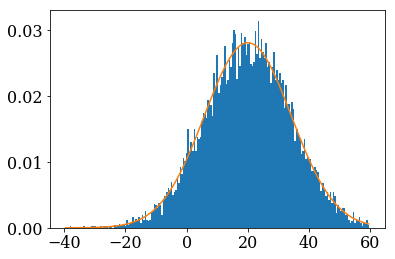

In [25]:
#on choisi u=0 (on le mettra simplement pas dans le calcul)
sigma = 1.0
sigma2=2*alpha*T+sigma**2

#creation de bins centré autour de 0
binwidth=0.5
bins=np.arange(-40,60, binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

plt.hist(x[nt], bins, normed=True);
plt.plot(bin_centers, np.exp(-(bin_centers-c*T)**2/(2.0*sigma2))/np.sqrt(2*np.pi*sigma2))

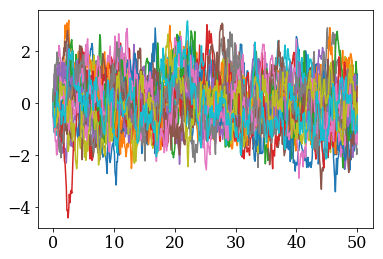

In [26]:
#commençons par suivre une particule, initialement au repos en x=0

T2=20.0   #durée totale de simulation
npart=10000
nt2=500   #nb de pas de temps 
dt2=T2/nt2  #interval de temps

alpha=2.0    #coeff de diffusion
gamma=2   #cte à déterminer?
#C.I.
t2 = np.arange(0,T2+dt2, dt2)
x = np.empty([nt2+1,npart])
x[0]=0

for i in range(nt2):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt2)*np.random.normal(0,1,npart)-gamma*x[i]*dt2
for i in range(20):    
    plt.plot(t,x[:,i])

Procédons de façon similaire:
On a $dx = -\gamma x dt + \sqrt{2 \alpha dt}N(0,1)$
On repart d'une distribution gaussienne initiale $\sqrt{2 \alpha dt}N(0,1)$ à laquelle on ajoute un terme de friction. Regardons ce terme en particulier $ \frac{dx}{x}=-\gamma dt$, en intégrant $x=x_0 e^{-\gamma t}$ ou $x_0$ est notre gaussienne de départ. On observe donc que notre position va finir par tendre vers 0 via une exponentielle décroissante. Par conséquent on peut en déduire que la moyenne va elle aussi tendre vers 0 avec ce même facteur exp: $ \mu \rightarrow \mu e^{-\gamma t}$. Il en sera de même pour la variance: $$ \sigma^2 \rightarrow \sigma^2 e^{-2\gamma t}$$

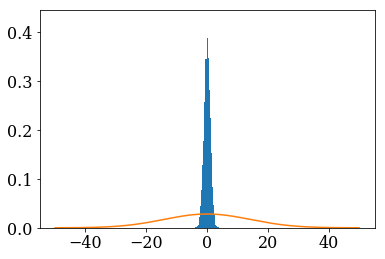

In [39]:
sigma=1.0*np.exp(-2*gamma*T)
sigma3=2*alpha*T+sigma**2
# Generate bins centered around 0
binwidth=0.1
bins=np.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
plt.hist(x[nt],bins,normed=True);

plt.plot(bin_centers, np.exp(-(bin_centers)**2/(2.0*sigma3))/np.sqrt(2*np.pi*sigma3))



### The Ising Model

sert à étudier le ferromagnétisme et peut être utilisé pour étudier les transition de phase. Certains matériaux peuventdevenir des aiamnt après avoir été exposé pendant un certain temps à un aiment permanent, mais cette propriété disparait à la température de Curie $T_c$ et dépend du matériel ferromagnétique. A cette température on a une transition de phase.

Dans le model de Ising, le materiau considéré est décrit à l'aide de dipoles, distribués sur une grille régulière. Les dipoles peuvent pointer vers le haut ou vers le bas. Ils représentent les atomes constituants le matériel et agissent comme des aiments orientés dans différentes directions.

Dans la version la plus simplifiée de ce model, tout les dipoles intergagissent avec leurs voisins les plus proche, lorsque deux voisins sont alignés, le system est dans une configuration plus stable que sils étaient alihĝnés dans des directions opposées.

On note l'énergie du ce système: $$E=-J\sum_{pairs(i,j)}s_is_j$$

Ici la somme parcourt les pairs de dipoles du système et $s_i$ dénote le spin du i-ème dipole qui vaut $1$ ou $-1$ (quelque soit son sens). $J>0$ est la constante de couplage pour chaque paire de dipole. On voit alors que l'énergie est minimisé et vaut $-jN_{paires}$ lorsque tout les dipoles pointent dans la même direction. 

A chaque fois qu'un dipôle s'inverse, l'énergie varie de: $\Delta E = 2Js_i\sum_{j\in n(i)}s_j$
Ou $n(i)$ décrit tout les voisins du i-ème dipôle. Cette varaiation d'énergie peiut aussi bien être >0 que <0 en fonction du signe de $s_i$ et du spin total des voisins. 

La proba de trouver notre système dans une certaine configuration $X$ est donné par: $$ p(X) = \frac{e^{-\beta E_X}}{Z}$$ avec $E_X$ est l'énergie potentielle. $Z$ est le facteur de normalisation: $$Z=\sum_X e^{-\beta E_X}$$

Retenons: $$<E> = \frac{\sum_X E_X e^{-\beta E_X}}{Z}$$ $$<M>=\frac{\sum_X M_X e^{-\beta E_X}}{Z}$$ où M est la magnétisation et $M_X = \sum_{i=1}^N s_i$.
Au-dessus de la température de Curie on a $<M>=0$.

### The Metropolis algorithm

Il est très difficile d'encoder des moyennes, car lorsque notre grille devient trop grande le nombre d'état possible devient trop grand. 

Considérons un état initial où le spin a une orientation aléatoire. L'algo metropolis consiste à choisir un spin aléatoire et à essayer de changer son orientation. Si l'énergie du spin inversée décroit, alors l'état inversé est choisi comme nouvelle configuration du système. Dans l'autre cas l'inversion est uniquement acceptée avec une proba de $ p_{flip}=e^{-\beta \Delta E}$ et sinon c'est la config originale qui est conservée. Ce processus est répété jusqu'à ce que l'échantillon de $X_k$ est suffisament grand. Et on aura: $$<E> = \frac{\sum_k E_k}{N_k}$$ $$<M> = \frac{\sum_k M_k}{N_k}$$ Où la somme parcourt tout les états générés et $N_k$ est le nb total de ces derniers. 

Comparé à la moyenne sur tout les états possibles, on voit qu'ici on ne somme que sur un partie de ces derniers. Mais grâce à l'algo de Metropolis, les états correspondants à différentes valeurs d'énergie sont générer avec la bonne fonction de distribution et les moyennes ci-dessus convergent vers l'équilibre lorsque $N_k \rightarrow \infty$.

Autrement dit l'histo normé des états générés avec Metropolis convergent vers le même histo obteni en utilisant tous les états pondérés avec leur facteur de Boltzmann.



**Verification**

Regardons le bon fonctionnement via un système simplifié, oÙ tout les spins sont fixés, sauf à un endroit.

Avant cela, adoptons un système unitaire sans dimensions. Initialement notre problème n'a que deux paramètres: la température $T$ et la constante de couplage $J$. Mais si on prend comme énergie le produit $k_BT$ notre modèle n'aura plus qu'un paramètre libre: $\alpha = J/(k_BT).

$$\Delta E = \alpha s_i \sum_{j \in n(i)} s_j$$
$$p_{flip}=e^{-\Delta E}$$

Deux matériaux qqc à une certaine température peuvent être décrit par la même équation s'ils ont le même $\alpha$.

In [ ]:
nx=10
ny=10

#cte sans dim de couplage J/KbT
alpha = 0.1

#spin initial à chaque site
sp=np.load('initial_state.npy')

plt.figure(figsize=(6,6))
plt.imshow(sp,interpolation = "none", origin='lower')

les deux couleurs représentent les spins vers le haut ou vers le bas.

In [ ]:
def energy_at_site(sp, alpha, sigma, ix, iy):
    """Implémente la contribution à l'énergie pour un spin donné en ix, iy avec une grille ayant des CoB periodiques.
    
    Paramètres:
    ----------
    sp: np.array de spin
    alpha: réel
        cte de couplage J/(KbT)
    sigma: int
        spin at site ix,iy
    ix: int
        position en x
    iy: int
        position en y
        
    Returns:
    --------
    energie 
    """
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy


In [ ]:
print(energy_at_site(sp,alpha,-1,5,5))

In [ ]:
print(energy_at_site(sp,alpha,1,5,5))

On en conclut que la configuration avec le spin vers le haut a l'énergie la plus basse. Or comme le dipole va continuellement changer de sens à cause des fluctuations thermiques, il devrait être plus souvent dans cette direction:

$$\frac{p(up)}{p(downs}=e^{-\Delta E}=e^{0,4}\approx 1,49$$

on aimerait maintenant reprouire ce résultat en utilisant une séquence d'états avec Metropolis. Pour cela commençons par définir une routine qui inverse l'état à une certaine position avec proba $p_{flip} = e^{-\Delta E}$

In [ ]:
def metropolis_at_site(sp, alpha, ix, iy):
    """ inverse un dipole en ix,iy si les cond de proba sont vérifiées
    
    Paramètres:
    ---------
    sp:np.array des spins
    alpha: réel
        cte de couplage
    ix: int
        position en x
    iy: int
        position en y
    """
    
    sigma=sp[ix,iy]
    energy_before_flip=energy_at_site(sp, alpha, sigma, ix, iy)
    sigma = -sigma
    energy_if_site_flipped=energy_at_site(sp,alpha, sigma, ix,iy)
    
    #inversion avec proba Metropolis
    #cond tj satisfaite si dE<0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped-energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

génerons maintenant une séquence d'état avec Metropolis et implémentons le rapport des états:

In [ ]:
NMC = 100000
states = np.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0, NMC):
    metropolis_at_site(sp, alpha, 5,5)
    states[n]=sp[5,5]
    
ups= np.extract(states==1, states).size
downs=NMC - ups
print(ups/downs)

**Challenge:** Vérifiez que ce n'est pas une coïncidence et que l'algo Metropolis donne le bon rapport de "ups" et "downs" pour différentes configurations de grilles. Utilisez:  

In [ ]:
def initial_state(nx,ny):
    """Crée une grille avec des spins orientés aléatoirements
    
    Paramètres:
    ----------
    nx: int
        points discretisés en x
    ny: int
        points discretisés en y
        
    Returns:
    -------
    R: 2D array de spins
    """
    
    #spin aléatoire et uniform entre 0 et 1
    r = np.random.randint(0,2,(nx,ny))
    
    #la où r=0 on assigne des spins <0
    r[r==0]=-1
    
    return r

In [ ]:
sp=[]
i=7
j=7
N=5
for n in range(N):
    spi=initial_state(i,j)
    sp.append(spi)
    i=i+5
    j=j+5



In [ ]:
for k in range (N):
    NMC = 100000
    states = np.empty(NMC+1)
    current=sp[k]
    states[0]=current[5,5]

    for n in range(0,NMC):
        metropolis_at_site(current,alpha,5,5)
        states[n]=current[5,5]

    ups = np.extract(states==1, states).size
    downs = NMC - ups
    unflip=energy_at_site(current,alpha,-1,5,5)
    flip= energy_at_site(current,alpha,1,5,5)
    print(np.exp(-(flip-unflip)), (ups/downs))



### Back to the Ising Model

On aimerait montrer qu'un matériel ferromagnétique est en effet soumis à une transition pour un certain $\alpha$ en utilisant l'algo Metropolis afin de génerer une séquence de grilles avec les bonnes probas.

On commence par initialiser la grille avec tout les spins pointant vers le haut

In [ ]:
nx = 100
ny = 100

sp=np.ones([nx,ny])

On a besoin d'une routine pour créer une séquence d'états en essayant d'inverser les spins à des endroits aléatoires  si la cond metropolis est vérifiée. Notons qu'au lieu de garder tous les états, on tente $nx*ny$ inversion entre celles retenues, de telle sorte que le système ait une chance de changer.

In [ ]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """Crée une séquence d'états pour le model Ising avec metropolis
    
    Paramètre:
    ---------
    sp: etats initial de la grille
    nx: int
        point discretisé en x
    ny: int
        point discretisé en y
    NMC: int
        nb d'états à créer
    alpha: réel
        cte de coplage
    Returns:
    --------
    états: séquence
    """
    
    states = np.empty([NMC+1, nx,ny])
    states[0] = sp.copy()
    
    for i in range(1, NMC+1):
        for j in range(0, nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp, alpha, ix, iy)
        states[i]=sp.copy()
    return states

Comparons ce qu'il se passe pour deux valeurs différentes de $\alpha$

In [ ]:
NMC = 100
alpha =0.2

states_0_2= ising_model_metropolis(sp,NMC,nx,ny,alpha)

In [ ]:
NMC = 100
sp=np.ones([nx,ny])
alpha=0.7
states_0_7= ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [ ]:
fig = plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
imgl = plt.imshow(states_0_2[0], interpolation='none', origin='lower', vmin=-1, vmax=1)

plt.subplot(1,2,2)
imgl = plt.imshow(states_0_7[0], interpolation='none', origin='lower', vmin=-1, vmax=1)

#animate
def animate(i):
    img1.set_array(states_0_2[i])
    img2.set_array(states_0_7[i])
    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

In [ ]:
plt.figure()
plt.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
plt.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
plt.legend()
plt.tight_layout()